In [1]:
#Let's try Hierarchical Agglomerative Clustering on Mall_Customer's data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Himanshu Agarwal\Desktop\Python programs\ML using Python Microsoft\Mall_Customers - Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.set_index("CustomerID",inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [10]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df = df.apply(lb.fit_transform)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,1,0,30
2,1,3,0,67
3,0,2,1,4
4,0,5,1,64
5,0,13,2,31


In [11]:
#It is given that it is already cleaned up data.

In [12]:
#Now that we're done with clustering, we have to start with Hierarchichal Agglormerative Clustering

In [13]:
#We first have to import the hierarchy module as-

import scipy.cluster.hierarchy as sch

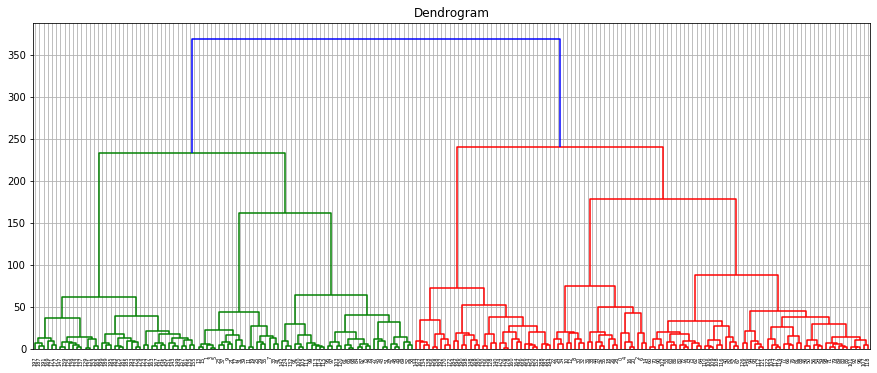

In [19]:
#We can plot our Dendrogram as-

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.grid(True)

dendrogram = sch.dendrogram(sch.linkage(df,method='ward'))
plt.show()

In [18]:
#Our Dendrogram has been plotted now.

In [21]:
#After plotting Dendogram, we import AgglomerativeClustering as-
from sklearn.cluster import AgglomerativeClustering

In [36]:
ac = AgglomerativeClustering(n_clusters=5)

In [37]:
x = df.copy()
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,1,0,30
2,1,3,0,67
3,0,2,1,4
4,0,5,1,64
5,0,13,2,31


In [38]:
ac.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [39]:
ac.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 4, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 3, 0, 3, 1, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int64)

In [40]:
x['Cluster Labels'] = ac.labels_

In [41]:
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Labels
CustomerID,,,,,
1,1,1,0,30,4
2,1,3,0,67,0
3,0,2,1,4,4
4,0,5,1,64,0
5,0,13,2,31,4


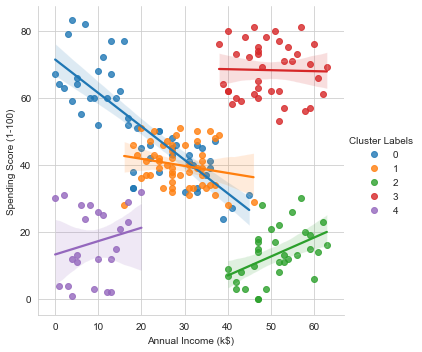

In [42]:
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=x,hue='Cluster Labels')